In [16]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [17]:
# read data
total = pd.read_csv('./total_fillna.csv')
total_fe = total.copy()
total_fe.drop(columns = ['Id'], inplace = True)
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Feature Engineering
## - 字串編碼(請參考 day02-data_analysis.ipynb 來判斷要用何種方式編碼)
1. One hot encoding
* [pandas.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)
2. Label encoding
* [sklearn.preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)(按照 ASCII 順序編碼)
* [Series.map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)(自行客製化)

## - 特徵合併

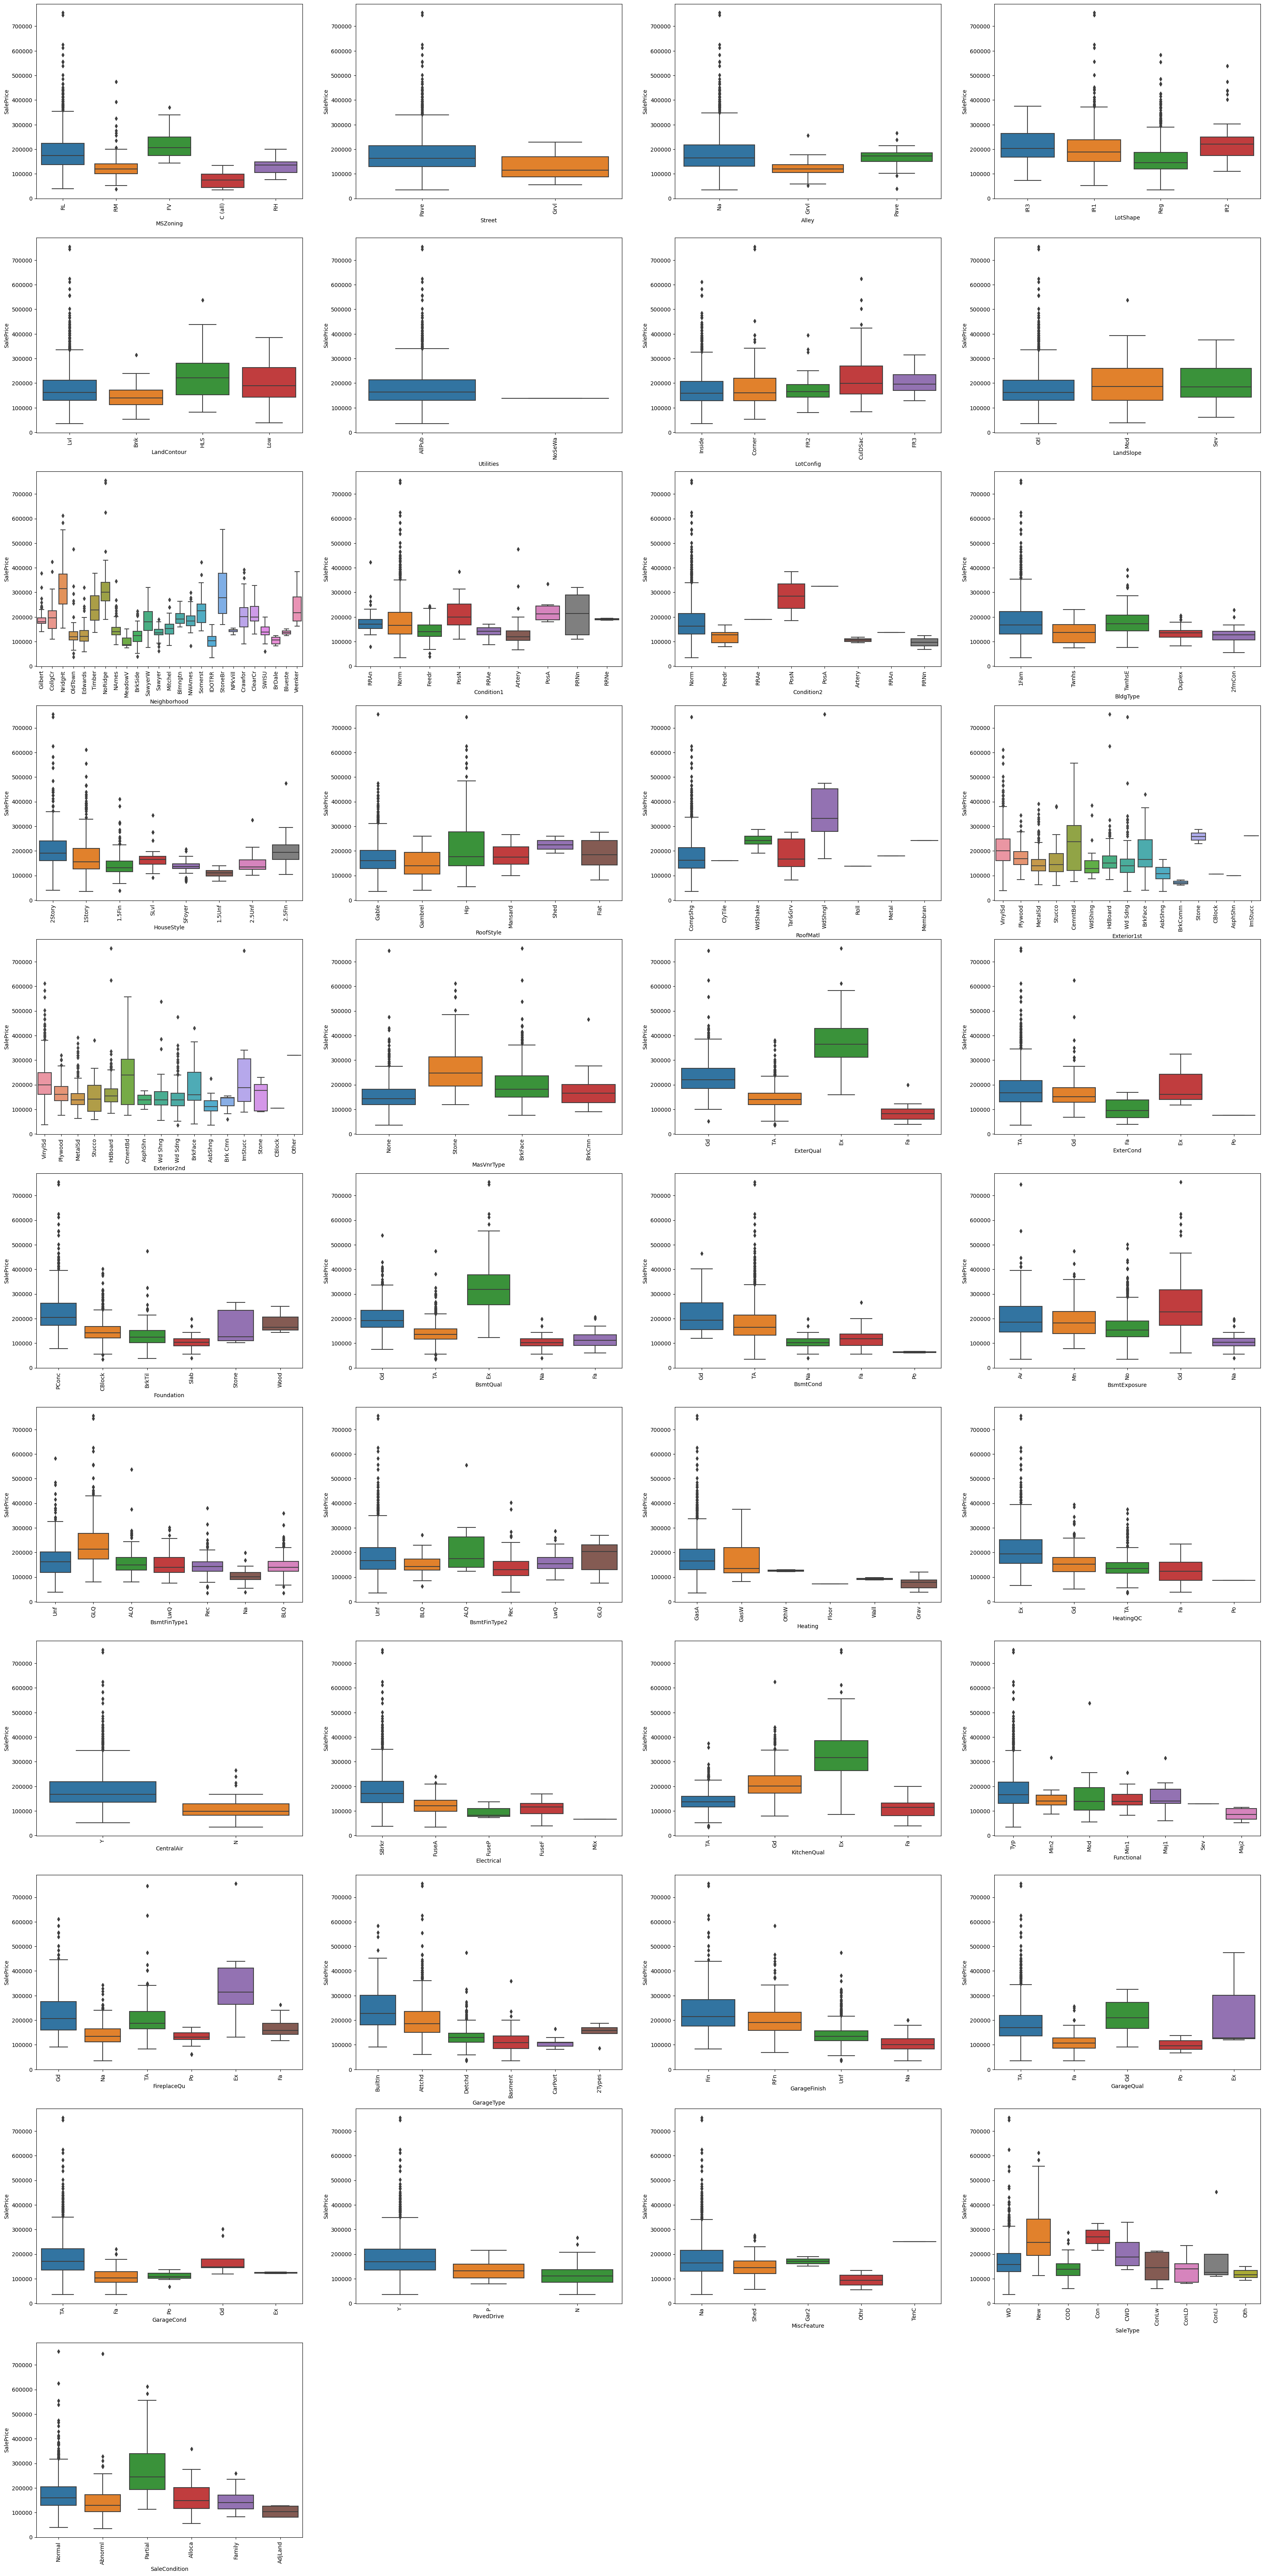

In [18]:
discrete = [f for f in total.columns if total.dtypes[f] == 'object']
y_label = 'SalePrice'
y = total[y_label]

plt.figure(figsize = (40, 85), dpi = 100)
for i, feature in enumerate(discrete):
    plt.subplot(11, 4, i + 1)
    sns.boxplot(x = total[feature], y = y)
    # plt.title(label = feature, fontdict = {'fontsize': 10})
    plt.xticks(rotation = 'vertical')

plt.show()

## Label Encoding

In [19]:
# MSZoning
map_dict = {'C (all)': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}
total_fe.MSZoning = total.MSZoning.map(map_dict)

# Street
# one hot encoding

# Alley
# one hot encoding

# LotShape
# one hot encoding

# LandContour
# one hot encoding

# Utilities
# one hot encoding

# LotConfig
# one hot encoding

# LandSlope
# one hot encoding

# Neighborhood
le = LabelEncoder()
total_fe.Neighborhood = le.fit_transform(total.Neighborhood)

# Condition1
total_fe.Condition1 = le.fit_transform(total.Condition1)

# Condition2
map_dict = {'Feedr': 0, 'RRNn': 1, 'Artery': 2, 'RRAn': 3, 'Norm': 4, 'RRAe': 5, 'PosN': 6, 'PosA': 7}
total_fe.Condition2 = total.Condition2.map(map_dict)

# BldgType
# one hot encoding

# HouseStyle
total_fe.HouseStyle = le.fit_transform(total.HouseStyle)

# RoofStyle
map_dict = {'Gable': 0, 'Gambrel': 0, 'Hip': 1, 'Mansard': 1, 'Shed': 2, 'Flat': 3}
total_fe.RoofStyle = total.RoofStyle.map(map_dict)

# RoofMatl
total_fe.RoofMatl = le.fit_transform(total.RoofMatl)

# Exterior1st
total_fe.Exterior1st = le.fit_transform(total.Exterior1st)

# Exterior2nd
total_fe.Exterior2nd = le.fit_transform(total.Exterior2nd)

# MasVnrType
map_dict = {'None': 0, 'BrkCmn': 1, 'BrkFace': 2, 'Stone': 3}
total_fe.MasVnrType = total.MasVnrType.map(map_dict)

# ExterQual
map_dict = {'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3}
total_fe.ExterQual = total.ExterQual.map(map_dict)

# ExterCond
# one hot encoding

# Foundation
total_fe.Foundation = le.fit_transform(total.Foundation)

# BsmtQual
map_dict = {'Na': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
total_fe.BsmtQual = total.BsmtQual.map(map_dict)

# BsmtCond
map_dict = {'Po': 0, 'Na': 1, 'Fa': 2, 'TA': 3, 'Gd': 4}
total_fe.BsmtCond = total.BsmtCond.map(map_dict)

# BsmtExposure
map_dict = {'Na': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
total_fe.BsmtExposure = total.BsmtExposure.map(map_dict)

# BsmtFinType1
total_fe.BsmtFinType1 = le.fit_transform(total.BsmtFinType1)

# BsmtFinType2
total_fe.BsmtFinType2 = le.fit_transform(total.BsmtFinType2)

# Heating
total_fe.Heating = le.fit_transform(total.Heating)

# HeatingQC
total_fe.HeatingQC = le.fit_transform(total.HeatingQC)

# CentralAir
map_dict = {'N': 0, 'Y': 1}
total_fe.CentralAir = total.CentralAir.map(map_dict)

# Electrical
total_fe.Electrical = le.fit_transform(total.Electrical)

# KitchenQual
map_dict = {'Fa': 0, 'TA': 1, 'Gd': 2, 'Ex': 3}
total_fe.KitchenQual = total.KitchenQual.map(map_dict)

# Functional
total_fe.Functional = le.fit_transform(total.Functional)

# FireplaceQu
total_fe.FireplaceQu = le.fit_transform(total.FireplaceQu)

# GarageType
total_fe.GarageType = le.fit_transform(total.GarageType)

# GarageFinish
map_dict = {'Na': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
total_fe.GarageFinish = total.GarageFinish.map(map_dict)

# GarageQual
total_fe.GarageQual = le.fit_transform(total.GarageQual)

# GarageCond
total_fe.GarageCond = le.fit_transform(total.GarageCond)

# PavedDrive
map_dict = {'N': 0, 'P': 1, 'Y': 2}
total_fe.PavedDrive = total.PavedDrive.map(map_dict)

# MiscFeature
total_fe.MiscFeature = le.fit_transform(total.MiscFeature)

# SaleType
total_fe.SaleType = le.fit_transform(total.SaleType)

# SaleCondition
total_fe.SaleCondition = le.fit_transform(total.SaleCondition)

## One hot encoding
- Hint: [pandas.concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [20]:
discrete = [f for f in total_fe.columns if total_fe.dtypes[f] == 'object']
for feature in discrete:
    dummies = pd.get_dummies(total_fe[feature], prefix = feature)
    total_fe = pd.concat([total_fe, dummies], axis = 1)
    total_fe.drop(columns = [feature], inplace = True)

## 特徵合併

In [21]:
total_fe['YrBltAndRemod'] = total_fe['YearBuilt'] + total_fe['YearRemodAdd']
total_fe['TotalSF'] = total_fe['TotalBsmtSF'] + total_fe['1stFlrSF'] + total_fe['2ndFlrSF']

total_fe['Total_sqr_footage'] = (
    total_fe['BsmtFinSF1'] + total_fe['BsmtFinSF2'] +
    total_fe['1stFlrSF'] + total_fe['2ndFlrSF']
)

total_fe['Total_Bathrooms'] = (
    total_fe['FullBath'] + (0.5 * total_fe['HalfBath']) +
    total_fe['BsmtFullBath'] + (0.5 * total_fe['BsmtHalfBath'])
)

total_fe['Total_porch_sf'] = (
    total_fe['OpenPorchSF'] + total_fe['3SsnPorch'] +
    total_fe['EnclosedPorch'] + total_fe['ScreenPorch'] +
    total_fe['WoodDeckSF']
)

drop_columns = [
    'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'BsmtFinSF2', 'FullBath',
    'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',
    'OpenPorchSF', '3SsnPorch', 'EnclosedPorch',
    'ScreenPorch', 'WoodDeckSF'
]

total_fe.drop(columns = drop_columns, inplace = True)

## 偏度調整

In [22]:
continual = []
for feature in total_fe.columns:
    if total_fe[feature].dtype != 'object':
        continual.append(feature)

skew_total_fe = total_fe[continual].apply(lambda x: skew(x)).sort_values(ascending = False)

high_skew = skew_total_fe[(skew_total_fe > 0.5) | (skew_total_fe < -0.5)]
skew_index = high_skew.index

for feature in skew_index:
    if feature != 'SalePrice':
        total_fe[feature] = boxcox1p(total_fe[feature], boxcox_normmax(total_fe[feature] + 1))

C:\Users\johnma\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\johnma\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\stats.py:3943: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


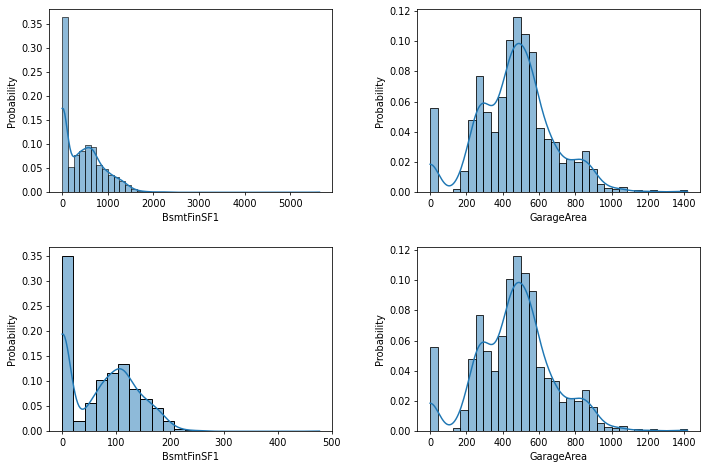

In [23]:
plt.figure(figsize = (12, 8), dpi = 70)
plt.subplot(2, 2, 1)
sns.histplot(total.BsmtFinSF1, kde = True, stat = 'probability', element = 'bars', label = 'BsmtFinSF1')
plt.subplot(2, 2, 2)
sns.histplot(total.GarageArea, kde = True, stat = 'probability', element = 'bars', label = 'GarageArea')

plt.subplot(2, 2, 3)
sns.histplot(total_fe.BsmtFinSF1, kde = True, stat = 'probability', element = 'bars', label = 'BsmtFinSF1')
plt.subplot(2, 2, 4)
sns.histplot(total_fe.GarageArea, kde = True, stat = 'probability', element = 'bars', label = 'GarageArea')
plt.subplots_adjust(wspace=0.3, hspace = 0.3)
plt.show()

## train test split

In [24]:
# Prepare training data and testing data
split_idx = 1095
target = 'SalePrice'

Train = total_fe[: split_idx]
Test = total_fe[split_idx: ]

y_train = np.asarray(Train[target], dtype = np.float64)
x_train = np.asarray(Train.drop(columns = [target]))

y_test = np.asarray(Test[target], dtype = np.float64)
x_test = np.asarray(Test.drop(columns = [target]))

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1095, 91) (1095,) (365, 91) (365,)


In [26]:
np.save('./x_train.npy', x_train)
np.save('./y_train.npy', y_train)
np.save('./x_test.npy', x_test)
np.save('./y_test.npy', y_test)